# **Data Warehouse & BigQuery**

https://github.com/DataTalksClub/data-engineering-zoomcamp/tree/main/03-data-warehouse

https://www.youtube.com/watch?v=jrHljAoD6nM&list=PL3MmuxUbc_hJed7dXYoJw8DoCuVHhGEQb&index=35

## **3.1 Data Warehouse**

**Content**:

1. OLAP vs OLTP
2. What is a data warehouse?
3. Bigquery (BQ)
    - Cost
    - Partitions and Clustering
    - Best Practices
    - Internals
    - ML in BQ

### **3.1.1 OLAP vs OLTP**

**OLAP** = **Online Analytical Processing**

**OLTP** = **Online Transactional Processing**

|        |**OLTP**|**OLAP**|
|--------|----|----|
|**Purpose**|Control and run essential business operations in real time|Plan, solve problems, support decisions, discover hidden insights|
|**Data Updates**|Short, fast updates initiated by user|Data periodically refreshed with scheduled, long-running batch jobs|
|**Database Design**|Normalised databases for efficiency|Denormalised databases for analysis|
|**Space Requirements**|Generally small if historical data is archived|Generally large due to aggregating large datasets|
|**Backup & Recovery**|Regular backups required to ensure business continuity and meet legal and governance requirements|Lost data can be reloaded from OLTP database as needed in lieu of regular backups|
|**Productivity**|Increases productivity of end users|Increases productivity of business managers, data analysts and executives|
|**Data View**|Lists day-to-day business transactions|Multi-dimensional view of enterprise data|
|**User Examples**|Customer-facing personnel, clerks, online shoppers|Knowledge workers such as data analysts, business analysts and executives|

- **OLTP** databases are used in your **backend services**, where you need a couple of sql queries to store the data and you want to fall-back/roll-back in case one of them fails
- **OLAP** databases are designed to **store large volumes of data** and **discover hidden insights** (mainly analytical purposes)

### **3.1.2 What is a Data Warehouse (DW)?**
- A **DW** is an **OLAP solution**, used for **reporting** and **data analysis**

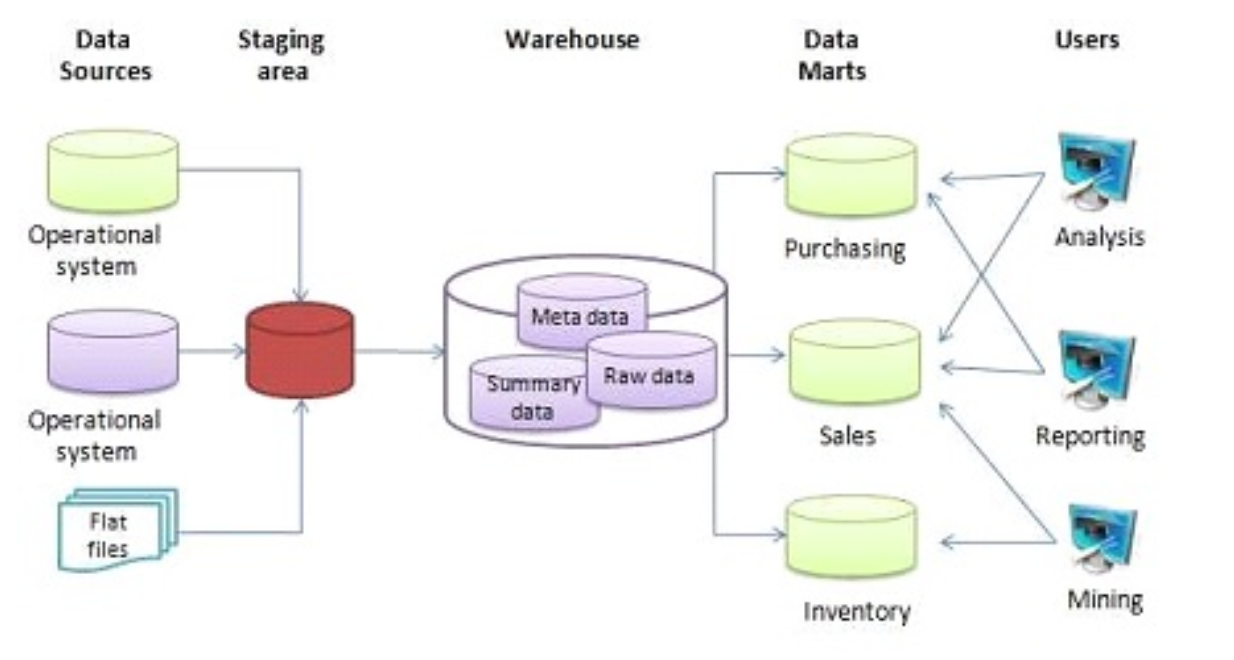

- A DW generally consists of **raw data**, **meta data** and **summary data**
- Generally, a DW has **many data sources**, such as **operational systems**, **flat files systems**, **OLTP databases**. All these sources **report** to a **staging area** which is then written to a DW.
- On the **output side**, DWs can be transformed into **Data Marts** which **different users** can **directly access**. For **data analysts**, interacting with **data marts** could be a good use case. However, for **data scientists**, it would make more sense to interact directly with the **raw data** stored in the **DW**

### **3.1.3 BigQuery**
(SQL code here: https://github.com/DataTalksClub/data-engineering-zoomcamp/blob/main/03-data-warehouse/big_query.sql)

- It is a **DW solution**
- **Serverless DW**
    - There are no servers to manage or database software to install
    - Often, when a company starts on its journey of DW/ data analytics, a considerable amount of time is spent in creating a DW, maintaining it, etc... all these issues are removed by using serverless DW solutions such as BQ
- **Software** as well as **infrastructure**, including **scalability** and **high availability**
    - Scalability: For example, you can start with a small dataset in BQ (e.g. a couple of GBs, $10^9$ bytes) and scale easily to Petabytes ($10^15$ bytes, a million-fold increase) level
- **Built-in features** like:
    - **ML** (via the SQL interface)
    - **Geospatial analysis**
    - **Business intelligence**
- BQ maximises **flexibility** by **separating the compute engine** that analyses your data from your **storage**. 
    - Generally, when you have one big server with storage and compute together, once your data size increases, your machine has to grow with it. BQ takes advantage of separating the compute engine and analysing your data on a separate storage of your choice. This is a huge improvement for managing costs.


#### **BQ Costs**

BQ has **two pricing models**:
- **On demand pricing**:
    - 1 TB ($10^12$ bytes) of data processed is $5
- **Flat rate pricing**:
    - Based on **number of pre-requested slots**
    - **100 slots** --> $2000/month = 400 TB data processed on demand pricing. 
    - It doesn't make sense to use the flat rate model, unless you are processing > 200 TB of data per month


You also need to consider **competing queries**. For example, if you have 50 queries running and all 100 slots are full, your 51st next query will have to wait. This waiting would not happen if the query is running with on demand pricing (because more slots would be automatically allocated when necessary)

You can import tables in BQ directly from a GCP bucket using SQL commands:
```sql
-- Creating external table referring to gcs path
CREATE OR REPLACE EXTERNAL TABLE `taxi-rides-ny.nytaxi.external_yellow_tripdata`
OPTIONS (
  format = 'CSV',
  uris = ['gs://nyc-tl-data/trip data/yellow_tripdata_2019-*.csv', 'gs://nyc-tl-data/trip data/yellow_tripdata_2020-*.csv']
);
```

The use an **external table in BigQuery SQL** is a **design choice** dependent on your data's location and how you want to interact with it. Let's explore the reasons why you might choose to use one:

- D**ata Residing Outside BigQuery**: If your data lives in a location other than BigQuery (like **Cloud Storage**, **on-premises storage**, or **another data warehouse**), an external table provides a way to **query that data without importing it into BigQuery**. This **saves storage space and import time**, particularly beneficial for **large datasets** you **don't need to frequently modify within BigQuery** itself. You're essentially creating a **virtual view of your external data source** within the BigQuery environment.
- **Data Access Control**: External tables can enforce **finer-grained access control**. You might have **security policies** that dictate **how external systems can access your data**. Using external tables can help you manage these policies more effectively by **controlling access through BigQuery's IAM system** rather than directly managing access to the underlying data storage.
- **Cost Optimization**: For large, infrequently accessed datasets, avoiding data import **reduces storage costs**. You **only pay for the queries** executed against the external table, not for storing a copy of the data in BigQuery.
- **Schema Enforcement**: While the data itself remains outside of BigQuery, defining a schema for the external table ensures type consistency when querying, leading to better data integrity and simplifying query development.

### **Data Partitioning**

https://cloud.google.com/bigquery/docs/partitioned-tables

Data partitioning is the process of **dividing a large dataset into smaller**, **more manageable pieces**, called **partitions**. This technique is used to **improve query performance**, **manageability**, and **cost efficiency**. In **BigQuery**, partitioning can be done based on **different criteria**:

1. **Time-based Partitioning**: Dividing data based on **time intervals**, such as daily, monthly, or yearly partitions. This is useful for **time-series data** and can significantly improve query performance for **time-based queries**.

2. **Integer Range Partitioning**: Dividing data based on **integer ranges**. This is useful when you have a **numeric column** that can be **used to segment the data**.

3. **Hash Partitioning**: **Distributing data across a specified number of partitions** based on the **hash value of a column**. This ensures an **even distribution of data** and can improve query performance for evenly distributed datasets.

Partitioning helps in:
- **Improving Query Performance**: Queries can be executed on **specific partitions** rather than scanning the entire dataset, reducing the amount of data processed.
- **Cost Efficiency**: By reducing the amount of data processed in queries, partitioning can **lower query costs**.
- **Manageability**: Smaller partitions are easier to manage, backup, and restore.



In the example below we are going to partition a data table of Stack Overflow questions. We use a time-based partitioning, using the date table for defining the partitions.


 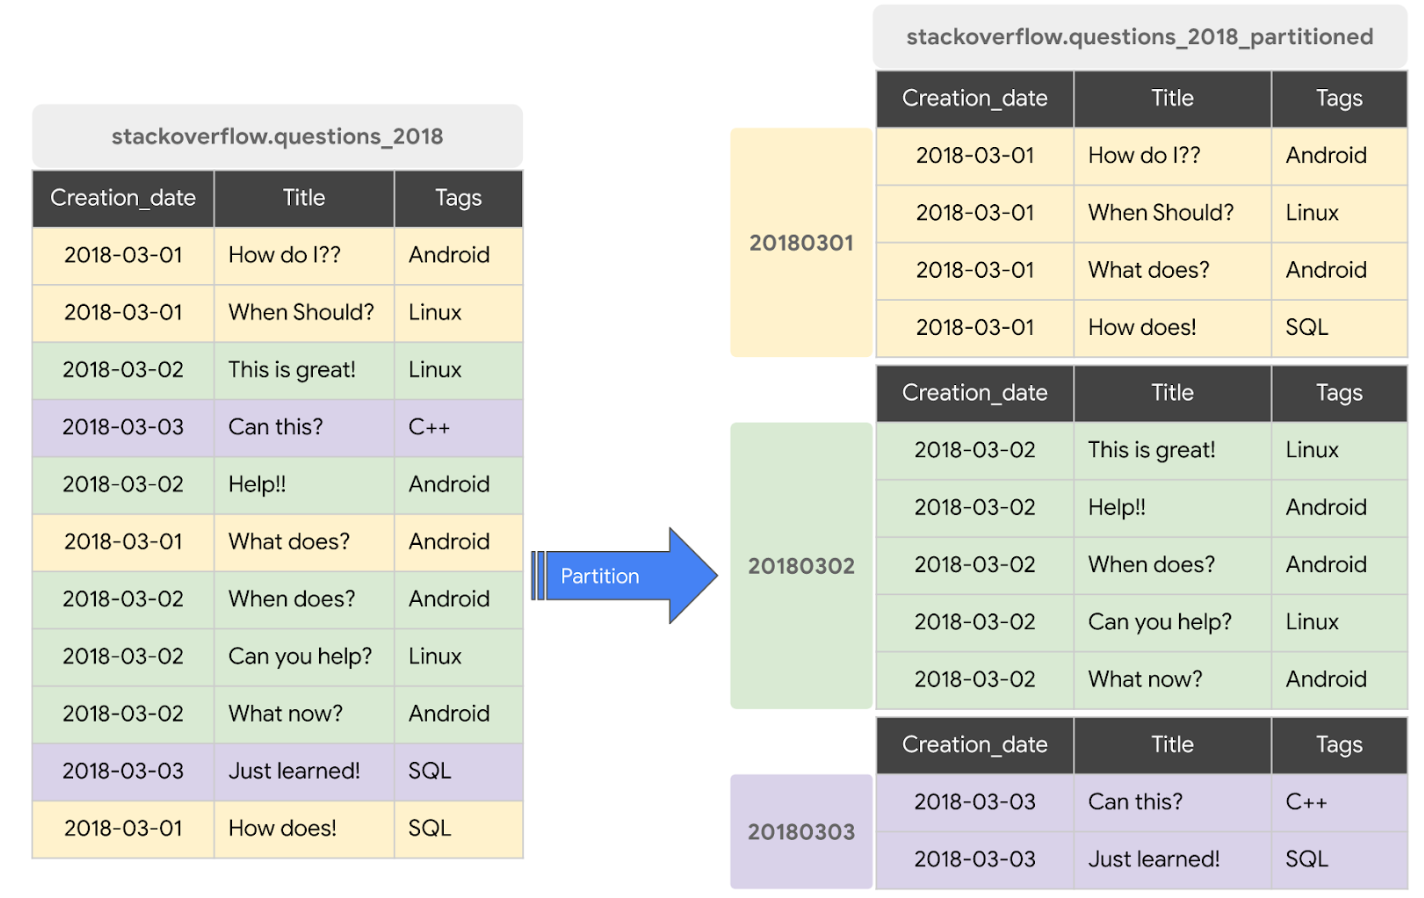

```sql
-- Create a non partitioned table from external table
CREATE OR REPLACE TABLE taxi-rides-ny.nytaxi.yellow_tripdata_non_partitoned AS
SELECT * FROM taxi-rides-ny.nytaxi.external_yellow_tripdata;

-- Create a partitioned table from external table
CREATE OR REPLACE TABLE taxi-rides-ny.nytaxi.yellow_tripdata_partitoned
PARTITION BY
  DATE(tpep_pickup_datetime) AS
SELECT * FROM taxi-rides-ny.nytaxi.external_yellow_tripdata;
```


```sql
-- Impact of partition
-- Scanning 1.6GB of data
SELECT DISTINCT(VendorID)
FROM taxi-rides-ny.nytaxi.yellow_tripdata_non_partitoned
WHERE DATE(tpep_pickup_datetime) BETWEEN '2019-06-01' AND '2019-06-30';

-- Scanning ~106 MB of DATA
SELECT DISTINCT(VendorID)
FROM taxi-rides-ny.nytaxi.yellow_tripdata_partitoned
WHERE DATE(tpep_pickup_datetime) BETWEEN '2019-06-01' AND '2019-06-30';

```sql
-- Let's look into the partitons
SELECT table_name, partition_id, total_rows
FROM `nytaxi.INFORMATION_SCHEMA.PARTITIONS` --- datasetid.INFORMATION_SCHEMA.PARTITIONS
WHERE table_name = 'yellow_tripdata_partitoned'
ORDER BY total_rows DESC;

### **Data Clustering**

https://cloud.google.com/bigquery/docs/clustered-tables

Data clustering is a technique used to **group similar data points together** based on their **characteristics**. In the context of databases and data warehouses, clustering can help **improve query performance** by **organizing data** in a way that makes it **faster to retrieve related records**. Clustering is **often used in conjunction with partitioning** to further optimize data storage and access.

In BigQuery, clustering can be done on **one or more columns** of a partitioned table. When you cluster a table, **BigQuery sorts the data based on the values in the clustered columns**. This sorting can significantly **reduce the amount of data scanned during queries**, leading to faster query performance and lower costs.

**Benefits** of data clustering:
- **Improved Query Performance**: By organizing data based on clustered columns, **queries that filter on these columns** can execute more efficiently.
- **Cost Efficiency**: Reduced data scanning leads to lower query costs.
- **Better Data Organization**: Clustering helps **maintain a logical order of data**, making it easier to manage and analyze.



We will use as example the same Stack Overflow table as above, which has been previously clustered. In the following diagram, the data has been also **clustered** (**sorted**) by the **column** `tag`

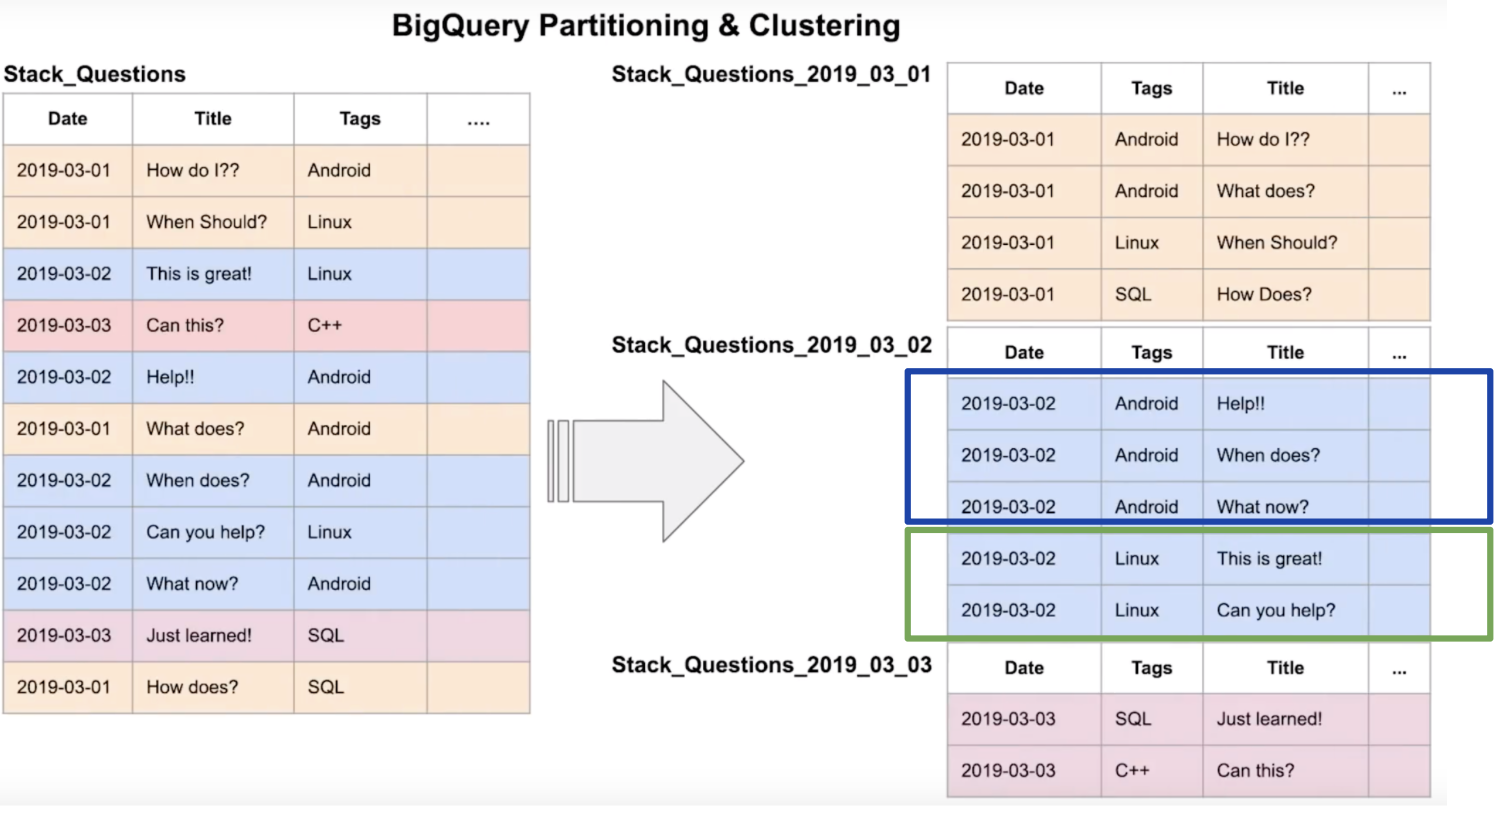

```sql
-- Creating a partition and cluster table
CREATE OR REPLACE TABLE taxi-rides-ny.nytaxi.yellow_tripdata_partitoned_clustered
PARTITION BY DATE(tpep_pickup_datetime)
CLUSTER BY VendorID AS
SELECT * FROM taxi-rides-ny.nytaxi.external_yellow_tripdata;

-- Query scans 1.1 GB
SELECT count(*) as trips
FROM taxi-rides-ny.nytaxi.yellow_tripdata_partitoned
WHERE DATE(tpep_pickup_datetime) BETWEEN '2019-06-01' AND '2020-12-31'
  AND VendorID=1;

-- Query scans 864.5 MB
SELECT count(*) as trips
FROM taxi-rides-ny.nytaxi.yellow_tripdata_partitoned_clustered
WHERE DATE(tpep_pickup_datetime) BETWEEN '2019-06-01' AND '2020-12-31'
  AND VendorID=1;

##### For **Tables** with data size **< 1 GB don't show significant improvement with partitioning or clustering**. Actually they **add a significant cost** because partitioning and clustering tables incur **metadata reads** and **metadata mainteinance**. Therefore it is better to **not** cluster/partition smaller tables

#### **BQ Partition**
When you create a partition table in BQ you can choose different **partition elements**:
- **Time-unit** column
- **Ingestion time** (`_PARTITIONTIME`)
- **Integer range** partitioning
- When using a time unit or ingestion time there are different resolutions:
    - **Daily** (default)
    - **Hourly**
    - **Monthly** or **Yearly**
- In BQ, the number of **partitions limit is 4000**

#### **BQ Clustering**
- The **columns you specify** are used to **colocate related data** --> the **order** of the column becomes very important since it is used to specify the sorting of the data
- Clustering **improves**:
    - **Filter queries**
    - **Aggregate queries**
- In BQ you can specify **up to 4 clustering columns**
- **Clustering columns** must be **top-level**, **non-repeated columns**:
    - `DATE`
    - `BOOL`
    - `GEOGRAPHY`
    - `INT64`
    - `NUMERIC`
    - `BIGNUMERIC`
    - `STRING`
    - `TIMESTAMP`
    - `DATETIME`

#### **Partitioning vs Clustering**

|Clustering    |Partitioning|
|--------|----|
|Cost benefit unknown|Cost known upfront (in BQ you can stop the execution of a query if above a costing limit if partitioned is enabled)|
|You need more granularity than partitioning alone allows|You need partition-level management (e.g., deleting partitions, creating new ones, moving them between storages, which is not possible with clustering)|
|Your queries commonly use filters or aggregation against multiple particular columns|Filter or aggregate on a single column (partitioning is only possible on one column)|
|The cardinality of the number of values in a column or group of columns is large|The cardinality of values is a hindrance in partitioning because it is limited to 4000 partitions per column per table|


**Clustering over partitioning**
You **should use clustering** over partition when:
- **Partitioning** results in **small amount of data per partition** (approximately < 1 GB)
- **Partitioning** results in a **large number of partitions**, beyond the limits on partitioned tables (4000)
- **Partitioning** results in your **mutation operations modifying the majority of partitions in the table frequently** (for example, every few minutes)

#### **Automatic reclustering in BQ**
As data is added to a clustered table
- The **newly inserted data** can be **written to blocks that contain key ranges** that **overlap** with the key ranges in **previously written blocks**
- These **overlapping keys weaken the sort property** of the table (they could increase the query time of the clustered data)

To **maintain the performance characteristics** of a clustered table
- BigQuery performs **automatic re-clustering in the background** to **restore the sort property of the table**
- Automatic reclustering **doesn't cost anything** to BQ users
- For **partitioned tables**, clustering is maintained for data **within the scope of each partition**.


#### **BigQuery-Best Practices**

Usually our efforts are focussed either on **cost reductions** or **improving query performance**

- **Cost reduction**
    - **Avoid** `SELECT *` (BQ stores data in a column storage, therefore it is always better to specify the specific columns' names)
    - **Price your queries** before running them
    - Use **clustered** or **partitioned** tables
    - Use **streaming inserts** with **caution**. This refers to the **process of continuously inserting data into a database in real-time**, as **opposed to batch inserts** where data is loaded in bulk at scheduled intervals. While streaming inserts can be useful for r**eal-time data processing and analytics**, they can also be **more expensive and complex to manage** compared to batch inserts.
    - **Materialize query results** in **stages**. This refers to the **practice of storing the results of intermediate queries as physical tables, rather than repeatedly computing the same results on-the-fly**. In Stages: Breaking down complex queries into smaller, manageable stages and materializing the results at each stage. For example materialise as intermediate tables CTEs that are used multiple times within the same query. 
    - **Free Cached Results**: When you run a query in BigQuery, the **results** are **cached for 24 hours**. If you run the same query again within this period, BigQuery will use the **cached results** instead of re-executing the query. This means **you won't be charged** for the data processed by the repeated query, leading to significant cost savings.

- **Increase Query performance**
    - **Filter** on **partitioned columns**
    - **Denormalizing** data
    - Use **nested** or **repeated columns** (they help to denormalise the data)
    - Use **external data sources** appropriately. **Don't use it**, in case you want a high query performance
    - **Reduce data before** using a `JOIN`
    - Do **not** treat `WITH` clauses as prepared statements
    - **Avoid oversharding tables**
    - **Avoid JavaScript user-defined functions**
    - Use **approximate aggregation functions** (`HyperLogLog++`, an advanced version of the HyperLogLog algorithm, which is a **probabilistic data structure** used for **estimating the cardinality** (number of unique elements) of a dataset)
    - **Order Last**, for query operations to maximize performance
    - **Optimize** your **join patterns**
        - As a best practice, place the **table with the largest number of rows first** (this will get **distributed evenly** across all the computation nodes), **followed by the table with the fewest rows** (this gets **broadcasted to all the computation nodes**), and then place the **remaining tables by decreasing size**.



**Table oversharding** refers to the practice of **dividing** a **database tabl**e into **too many smaller, individual pieces** called **shards**. Sharding is a database architecture pattern that involves splitting a large database into smaller, more manageable pieces, each called a shard. Each shard is a **separate database** that holds a **subset of the data**.

- **Sharding**: **Distributes data** across **multiple databases or servers** for **scalability**.
- **Partitioning**: **Divides** a **single table** into **smaller segments within the same database** for improved **performance** and **manageability**.
- **Clustering**: **Organizes data within a table** to **improve data locality** and **query performance**.


### **Internals of BQ**

- **BQ stores** our **data** into a **separate storage** called **`Colossus`**, which is generally a **cheap storage** that stores the data in a **columnar format**. 

- This has a big advantage since **separating storage from compute significantly decreases the costs** of the DW solution. For example, if you **data size increases**, you generally only have to **pay for the extra costs of storage in Colossus**, which is very cheap.

- The **majority of costs** come from **reading the data** or **running the queries** (i.e. the **compute** side)

- Since the **compute** and **storage components** for BQ are on **different hardware**, how do they communicate with each other? If the network is really bad, it will result in high query time, turning the solution into a huge disadvantage. However, to avoid this, BQ uses **Jupyter network**.

- **`Jupyter network`** is **inside BQ data centres** and provides about **1 TB/sec of network speed**. These remove all the potential delays caused by having compute and storage on separate hardware

- **`Dremel`** is the **query execution engine** and it generally **divides your query** into a **tree structure** so that **each node** can **execute** a **distinct subset of the query**



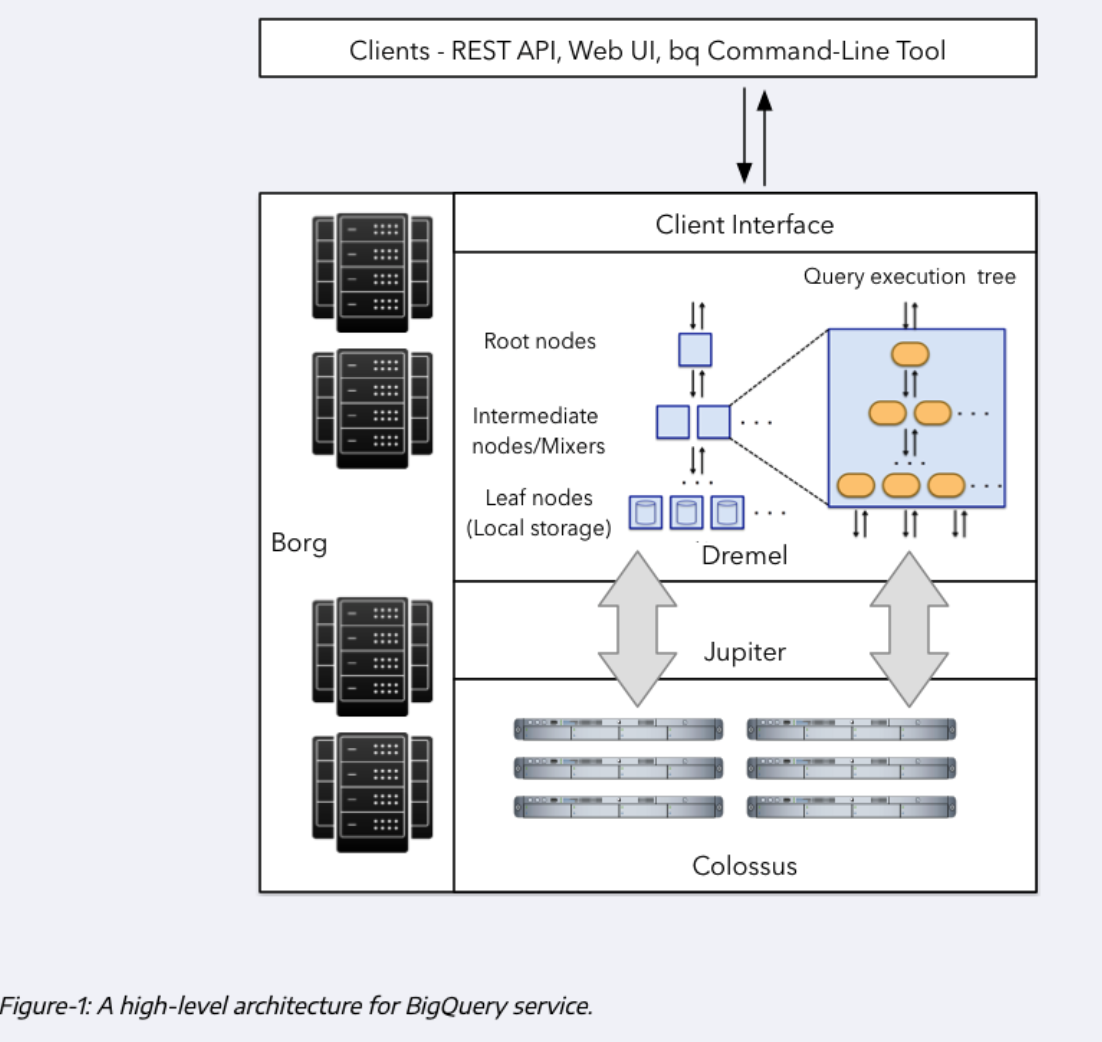

https://cloud.google.com/bigquery/docs/introduction  more updated...

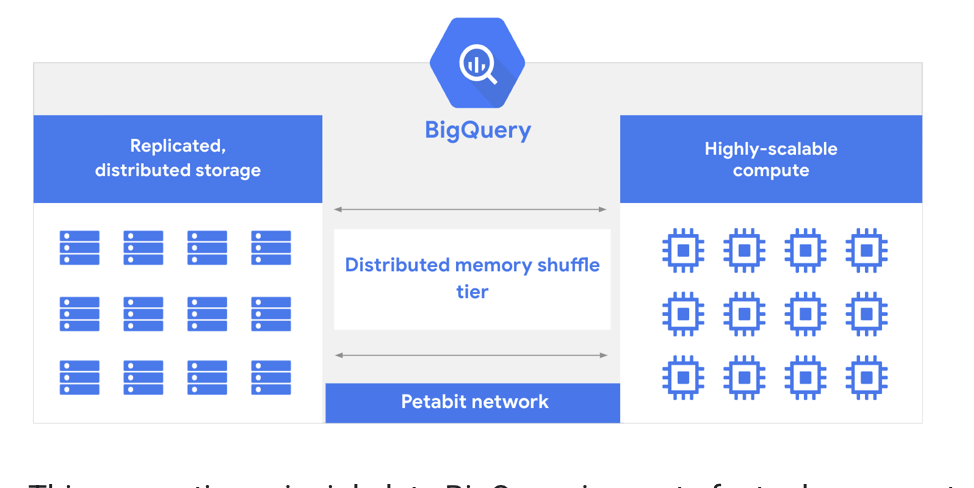

#### **Record vs column oriented structure**

- **Record-oriented structure** have structures very similar to **CSVs**. They are easy to process and understand
- **Column-oriented structure**: row1, row2 etc appear in multiple places with respect to the various columns in the table

**BQ** uses a **column-oriented structure**. **Column-oriented storage** allows to provide **better aggregations on columns**. Furthermore, when accessing DWs we usually do not query all the columns at one time: the usual requirements is **query few columns** and **filter and aggregate on different ones**

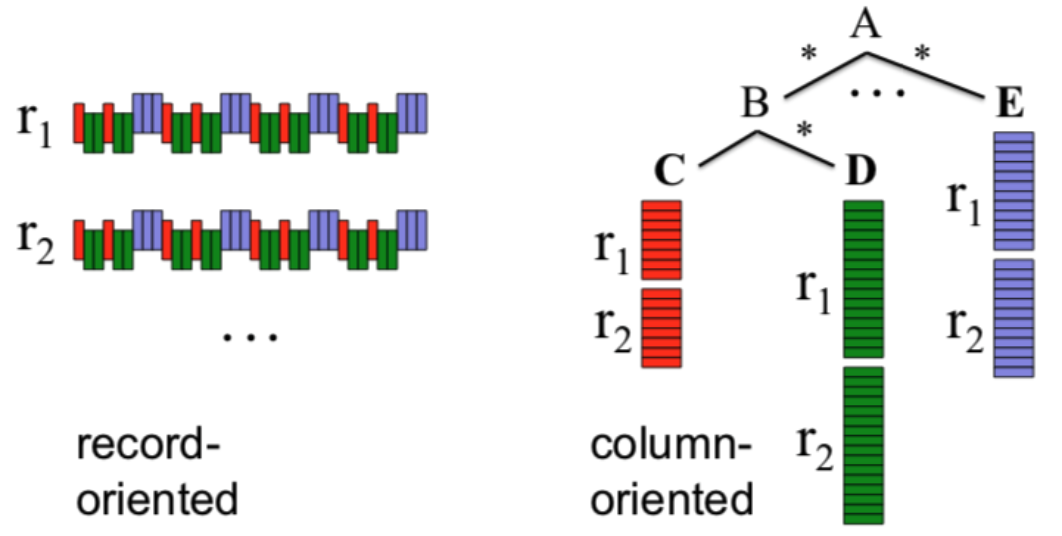

#### **Understanding how `Dremel` works**

`SELECT A, COUNT(B) FROM T GROUP BY A`

- When **BQ root server** receives this query, it understands it and knows how to divide it into smaller sub-modules: `SELECT A, SUM(c) FROM (R1i UNION ALL ... R1n) GROUP BY A`. In this example, the original queries is subdivided into smaller queries from `R1i` to `R1n`
- The **mixers** get the modified subqueries, which are then further divided into other subqueries, etc... 
- ... Until the request reaches the **leaf nodes**, which directly query **Colossus database**, **fetch the data** and execute **appropriate operations** on top of that and **return** the data **back to mixers**, which return the data to the **root server**, where the **data is finally aggregated and returned as a result**

- The **distribution of compute workers** in this system is the reason why **BQ** is so **fast**. If all the work had to be done on a particular compute node, it would result in a very high query time, with respect to increases in data sizes. Instead, BQ is smart enough to **divide the query into smaller chunks** and **propagate** it to the **leaf nodes**.

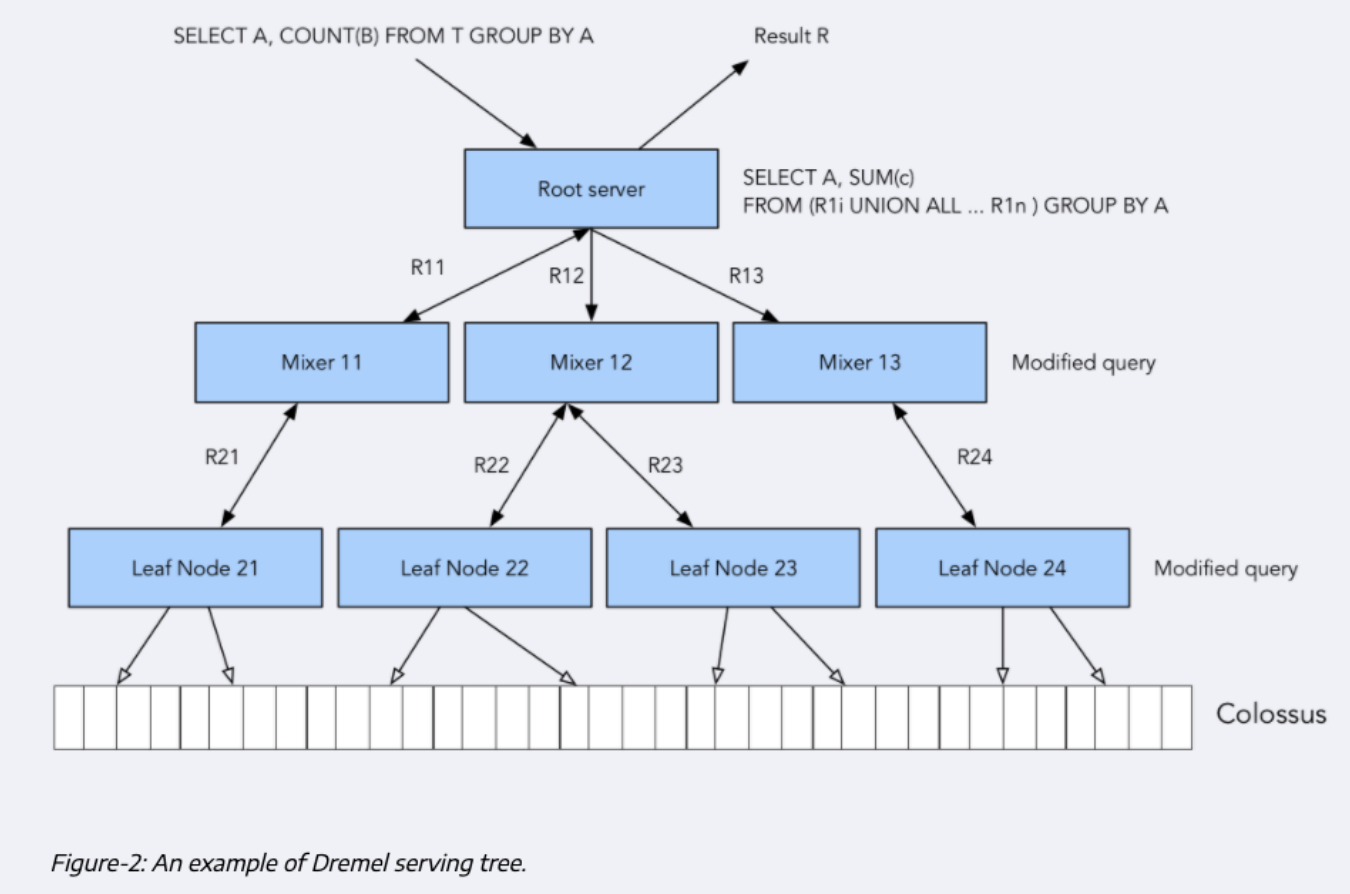

- https://research.google/pubs/dremel-interactive-analysis-of-web-scale-datasets-2/
- https://panoply.io/data-warehouse-guide/bigquery-architecture/
- http://www.goldsborough.me/distributed-systems/2019/05/18/21-09-00-a_look_at_dremel/

